In [13]:
import json

In [14]:
data0 = json.load(open('logs/data0.4-3.json'))
data1 = json.load(open('logs/data0.4-0.4.json'))
data2 = json.load(open('logs/data0.1-0.1.json'))

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "Helvetica"
})

In [17]:
duration = 50
Ts = 0.03

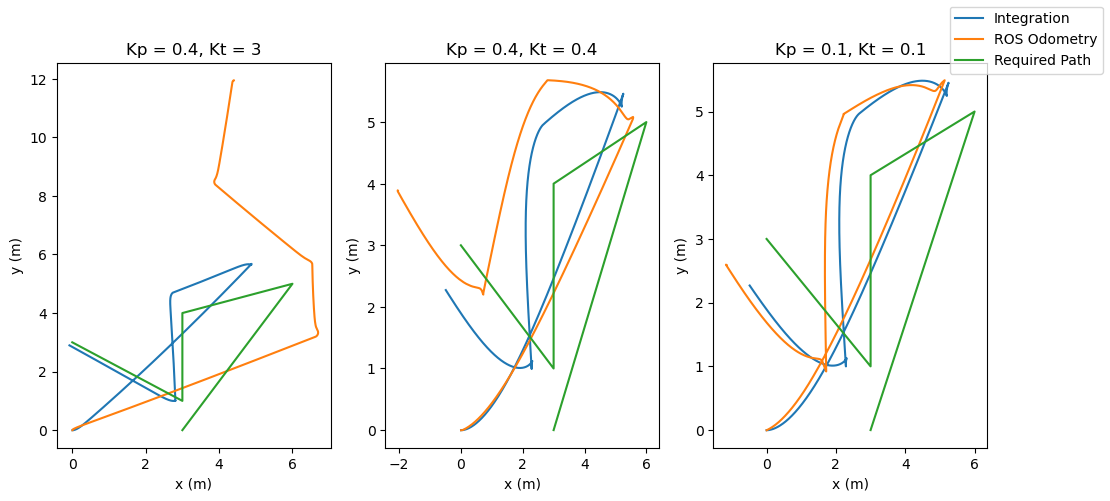

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

i = 0
for data in [data0, data1, data2]:
    qs = np.array([data['qs']]).squeeze()
    rqs = np.array([data['rqs']]).squeeze()
    ref = np.array([data['cp']]).squeeze()

    if i == 0:
        ax[i].plot(qs[:, 0], qs[:, 1], label='Integration')
        ax[i].plot(rqs[:, 0], rqs[:, 1], label='ROS Odometry')
        ax[i].plot(ref[:, 0], ref[:, 1], label='Required Path')
    else:
        ax[i].plot(qs[:, 0], qs[:, 1])
        ax[i].plot(rqs[:, 0], rqs[:, 1])
        ax[i].plot(ref[:, 0], ref[:, 1])
        
    ax[i].set_title(f'Kp = {data["kp"]}, Kt = {data["ktheta"]}')
    ax[i].set_xlabel('x (m)')
    ax[i].set_ylabel('y (m)')
    i += 1

fig.legend()
plt.savefig('assets/trajectory.png', dpi=300)
plt.show()